<a href="https://colab.research.google.com/github/rman1061/C4/blob/main/Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#PARP 116
import pandas as pd
# load data file
df = pd.read_csv("/content/PARP 116.txt",sep="\t")
df

,A,B,C,D,E,F,G,H
0,0.050156,0.072669,0.077729,0.199264,0.049406,0.028662,0.119538,0.095619
1,0.025154,0.047002,0.029990,0.154870,0.013190,0.045632,0.065716,0.025977
2,0.065737,0.069052,0.020719,0.201102,0.011822,0.041233,0.107815,0.015245


In [ ]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D','E','F','G','H'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

#A = vehicle
#B = 0.01
#C = 0.1
#D= 0.5
#E= 1
#F= 5
#G = 10
#H = 50

In [ ]:
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns


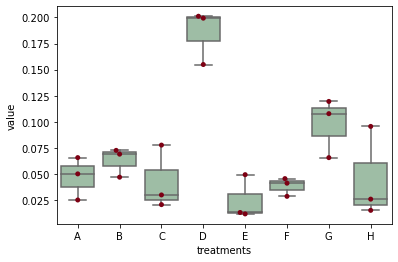

In [ ]:
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(fvalue, pvalue)

11.861776948817129 2.799841208469811e-05


In [ ]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),0.056779,7.0,11.861777,0.000028
Residual,0.010941,16.0,NaN,NaN


In [ ]:
pip install bioinfokit

     |████████████████████████████████| 92kB 2.4MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.4-cp37-none-any.whl size=56008 sha256=e55d9a7e9e18414fdd7ef55355ba84cfc7e7268c0a0b19a70a74650b7288b568
  Stored in directory: /root/.cache/pip/wheels/43/cf/aa/4a4fe54a3edb663ee7bd9b245bd946506c8bd4b99f4ae00507
  Created wheel for adjustText: filename=adjustText-0.7.3-cp37-none-any.whl size=7100 sha256=46cffcda647aaeea24dfbe095f91b0072c935221c824fa0391a097fe962c8dcd
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built bioinfokit adjustText


In [ ]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),7.0,0.056779,0.008111,11.861777,0.000028
Residual,16.0,0.010941,0.000684,NaN,NaN


In [ ]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat

In [ ]:
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()

In [ ]:
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,0.015892,-0.058034,0.089818,1.052610,0.900000
1,A,C,0.004202,-0.069724,0.078128,0.278351,0.900000
2,A,D,0.138063,0.064137,0.211989,9.144721,0.001000
3,A,E,0.022210,-0.051716,0.096136,1.471073,0.900000
4,A,F,0.008506,-0.065420,0.082432,0.563433,0.900000
5,A,G,0.050674,-0.023252,0.124600,3.356460,0.315978
6,A,H,0.001402,-0.072524,0.075328,0.092871,0.900000
7,B,C,0.020094,-0.053832,0.094020,1.330961,0.900000
8,B,D,0.122171,0.048245,0.196097,8.092111,0.001000
9,B,E,0.038102,-0.035824,0.112028,2.523683,0.623617


In [ ]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt


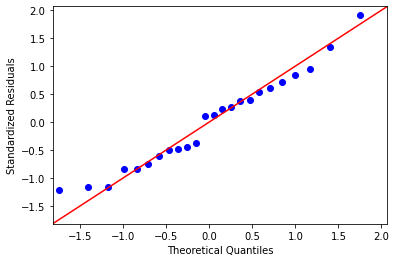

In [ ]:
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

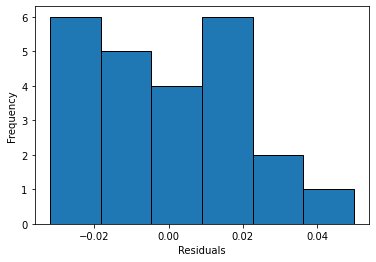

In [ ]:
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [ ]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the Levene's test
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df_melt, res_var='value', xfac_var='treatments')
res.levene_summary

,Parameter,Value
0,Test statistics (W),0.2638
1,Degrees of freedom (Df),7.0000
2,p value,0.9594


In [ ]:
#ERBETA
import pandas as pd
# load data file
df = pd.read_csv("/content/ERBETA.txt", sep="\t")
df

,A,B,C,D,E,F,G,H
0,0.790500,1.185471,1.329677,1.305471,0.897504,0.751024,0.873591,1.182036
1,0.684571,1.272870,1.432498,1.228470,0.739809,0.595011,0.808474,1.237052
2,0.734282,1.127258,1.246390,1.006808,0.689574,0.725795,1.089279,1.138708


In [ ]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D','E','F','G','H'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

In [ ]:
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns

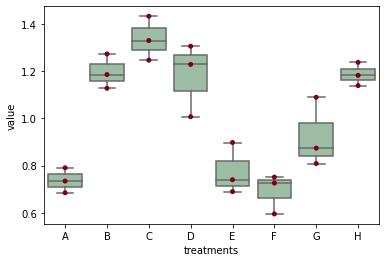

In [ ]:
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(fvalue, pvalue)

17.9942143838955 1.776572164655396e-06


In [ ]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),1.318338,7.0,17.994214,0.000002
Residual,0.167462,16.0,NaN,NaN


In [ ]:
pip install bioinfokit

     |████████████████████████████████| 92kB 3.6MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.4-cp37-none-any.whl size=56008 sha256=2f239fc556f8d2c5e6c145e0650c3d7f29cb6c4aeb318d9fba2235c96985eb4c
  Stored in directory: /root/.cache/pip/wheels/43/cf/aa/4a4fe54a3edb663ee7bd9b245bd946506c8bd4b99f4ae00507
  Created wheel for adjustText: filename=adjustText-0.7.3-cp37-none-any.whl size=7100 sha256=4469dc40fe7a8cd7a73ff87411597867ffd75e178adeaaf73e0bb25f43ed9a04
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built bioinfokit adjustText


In [ ]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),7.0,1.318338,0.188334,17.994214,0.000002
Residual,16.0,0.167462,0.010466,NaN,NaN


In [ ]:
from bioinfokit.analys import stat
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,0.458749,0.169530,0.747968,7.766724,0.001000
1,A,C,0.599738,0.310519,0.888956,10.153692,0.001000
2,A,D,0.443799,0.154580,0.733018,7.513614,0.001404
3,A,E,0.039178,-0.250041,0.328397,0.663295,0.900000
4,A,F,0.045841,-0.243378,0.335060,0.776095,0.900000
5,A,G,0.187331,-0.101888,0.476550,3.171550,0.379864
6,A,H,0.449481,0.160262,0.738700,7.609818,0.001235
7,B,C,0.140989,-0.148230,0.430207,2.386968,0.674787
8,B,D,0.014950,-0.274269,0.304169,0.253109,0.900000
9,B,E,0.419571,0.130352,0.708790,7.103428,0.002450


In [ ]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt

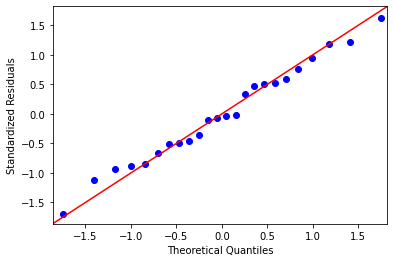

In [ ]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

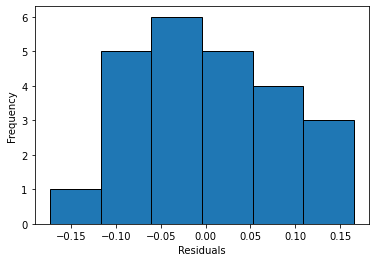

In [ ]:
#histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [ ]:
 # standardized residuals lie around the 45-degree line, this suggests that the residuals are approximately normally distributed
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)
#Used ZS


0.9841324090957642 0.9582085013389587


In [ ]:
import scipy.stats as stats
w, pvalue = stats.bartlett(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(w, pvalue)

3.9671292401805873 0.7835556123389469


In [ ]:
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=df_melt, res_var='value', xfac_var='treatments')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),3.9671
1,Degrees of freedom (Df),7.0000
2,p value,0.7836


In [ ]:
# the p value (0.7836) is non significant, we fail to reject null hypothesis and conclude that treatments have equal variances.



In [ ]:
#MNSOD

import pandas as pd
# load data file
df = pd.read_csv("/content/MNSOD.txt", sep="\t")
df

,A,B,C,D,E,F,G,H
0,0.343390,0.518813,0.512824,0.503131,0.593912,0.681530,0.667040,0.679557
1,0.405961,0.550234,0.468603,0.566593,0.596542,0.676215,0.723106,0.734341
2,0.227852,0.337555,0.290688,0.487873,0.467238,0.576175,0.718127,0.542092


In [ ]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D','E','F','G','H'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

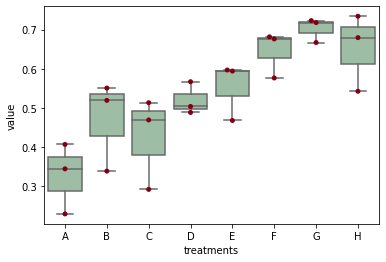

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(fvalue, pvalue)

6.95016752439643 0.0006727464155025148


In [ ]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),0.344628,7.0,6.950168,0.000673
Residual,0.113339,16.0,NaN,NaN


In [ ]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),7.0,0.344628,0.049233,6.950168,0.000673
Residual,16.0,0.113339,0.007084,NaN,NaN


In [ ]:
#The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences among treatments.


In [ ]:
#To know the pairs of significant different treatments, we will perform multiple pairwise comparison (post hoc comparison) analysis for all unplanned comparison using Tukey’s honestly significantly differenced (HSD) test.

In [ ]:
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,0.143133,-0.094802,0.381067,2.945581,0.465372
1,A,C,0.098304,-0.139631,0.336238,2.023033,0.810998
2,A,D,0.193465,-0.044470,0.431399,3.981377,0.158806
3,A,E,0.226830,-0.011105,0.464764,4.668008,0.067579
4,A,F,0.318905,0.080971,0.556840,6.562869,0.005135
5,A,G,0.377023,0.139089,0.614958,7.758898,0.001009
6,A,H,0.326262,0.088328,0.564197,6.714273,0.004172
7,B,C,0.044829,-0.193106,0.282763,0.922548,0.900000
8,B,D,0.050332,-0.187603,0.288266,1.035797,0.900000
9,B,E,0.083697,-0.154238,0.321631,1.722427,0.900000


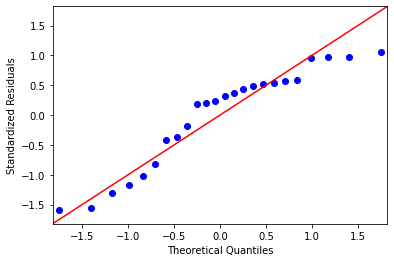

In [ ]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

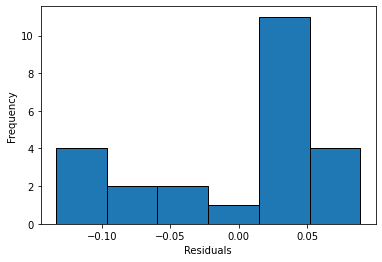

In [ ]:
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [ ]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the Levene's test
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df_melt, res_var='value', xfac_var='treatments')
res.levene_summary

,Parameter,Value
0,Test statistics (W),0.2926
1,Degrees of freedom (Df),7.0000
2,p value,0.9471


In [ ]:
import pandas as pd
# load data file
df = pd.read_csv("/content/CASPASE 3.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D','E','F','G','H'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

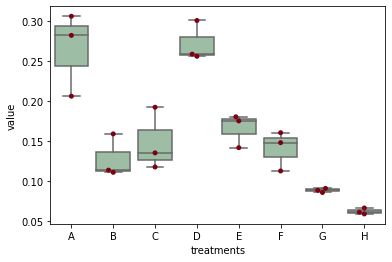

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(fvalue, pvalue)

20.399419853408123 7.46272669040328e-07


In [ ]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),0.119942,7.0,20.39942,7.462727e-07
Residual,0.013439,16.0,NaN,NaN


In [ ]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),7.0,0.119942,0.017135,20.39942,7.462727e-07
Residual,16.0,0.013439,0.000840,NaN,NaN


In [ ]:
#p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences among treatments.

# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary



,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,0.137271,0.055339,0.219204,8.203761,0.001000
1,A,C,0.116694,0.034761,0.198627,6.973990,0.002923
2,A,D,0.007064,-0.074869,0.088996,0.422150,0.900000
3,A,E,0.099285,0.017352,0.181218,5.933578,0.012230
4,A,F,0.124725,0.042792,0.206658,7.453949,0.001521
5,A,G,0.176922,0.094989,0.258854,10.573382,0.001000
6,A,H,0.203183,0.121251,0.285116,12.142841,0.001000
7,B,C,0.020577,-0.061355,0.102510,1.229771,0.900000
8,B,D,0.144335,0.062403,0.226268,8.625911,0.001000
9,B,E,0.037986,-0.043946,0.119919,2.270183,0.718495


In [ ]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt

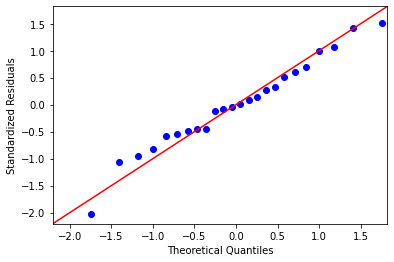

In [ ]:
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

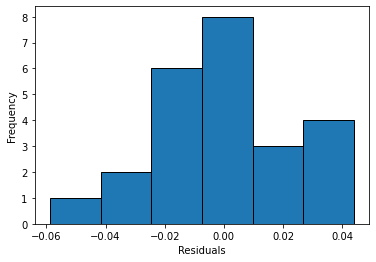

In [ ]:
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [ ]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9813075661659241 0.9186723232269287


In [ ]:
# distribution looks approximately normal and suggests that residuals are approximately normally distributed

In [ ]:
#Shapiro-Wilk test can be used to check the normal distribution of residuals. 

In [ ]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9813075661659241 0.9186723232269287


In [ ]:
#p value is non significant, we fail to reject null hypothesis and conclude that data is drawn from normal distribution.

In [ ]:
import scipy.stats as stats
w, pvalue = stats.bartlett(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(w, pvalue)

#Bartlett’s test to check the Homogeneity of variances

14.281376834534273 0.04639721448262891


In [ ]:
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=df_melt, res_var='value', xfac_var='treatments')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),14.2814
1,Degrees of freedom (Df),7.0000
2,p value,0.0464


In [ ]:
#As the p value (0.0464) is significant, we do not reject null hypothesis and have to conclude that treatments have unequal variances.


In [ ]:
import pandas as pd
# load data file
df = pd.read_csv("/content/new ERBETA.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

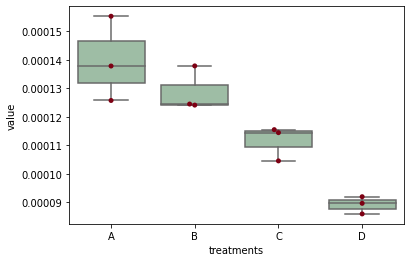

In [ ]:
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(fvalue, pvalue)

20.079011634404182 8.332812098986194e-07


In [ ]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),4.360312e-09,3.0,17.746599,0.000678
Residual,6.551959e-10,8.0,NaN,NaN


In [ ]:
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,0.000011,-0.000013,0.000034,2.065421,0.500599
1,A,C,0.000028,0.000004,0.000052,5.379664,0.021713
2,A,D,0.000050,0.000027,0.000074,9.647305,0.001000
3,B,C,0.000017,-0.000006,0.000041,3.314243,0.166981
4,B,D,0.000040,0.000016,0.000063,7.581884,0.003005
5,C,D,0.000022,-0.000001,0.000046,4.267641,0.064912


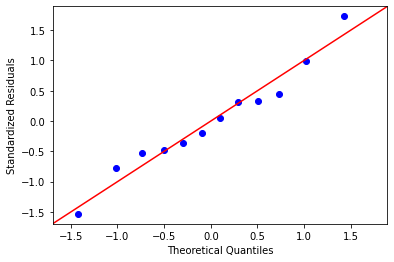

In [ ]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

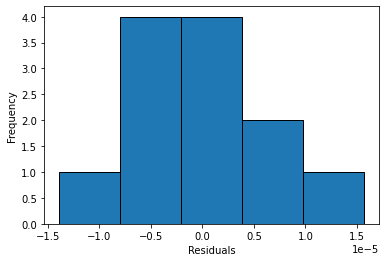

In [ ]:
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [ ]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.977942705154419 0.9741113185882568


In [ ]:
import scipy.stats as stats
w, pvalue = stats.bartlett(df['A'], df['B'], df['C'], df['D'],df['E'],df['F'],df['G'],df['H'])
print(w, pvalue)

16.511819170079004 0.020830276159776912


In [ ]:
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=df_melt, res_var='value', xfac_var='treatments')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),3.7831
1,Degrees of freedom (Df),3.0000
2,p value,0.2859


In [ ]:
#As the p value (0.2859) is non significant, we fail to reject null hypothesis and conclude that treatments have equal variances.


In [ ]:
#This concludes PC3 for now